## Ext + ATF2 Simulation in RF-Track

In [181]:
import RF_Track as rft
import numpy as np
import matplotlib.pyplot as plt

### Load the lattice

In [182]:
Ext_ATF2 = rft.Lattice('../Interfaces/ATF2/Ext_ATF2/ATF2_EXT_FF_v5.2.twiss')

In [183]:
Q = Ext_ATF2["MQM14FF"]
Q.get_offsets()

array([[0., 0., 0., 1., 0., 0., 0.]])

Replace the BPM at the IP with a Screen

In [41]:
Scr = rft.Screen()

Ext_ATF2['IP'].replace_with(Scr)

AttributeError: 'list' object has no attribute 'replace_with'

### Create the bunch

In [12]:
Pref = 1.2999999e3 # 1.3 GeV/c
population = 2e+10 # number of particles in the bunch

Ext_ATF2_twiss = rft.Bunch6d_twiss()
Ext_ATF2_twiss.emitt_x = 2e-3 # mm.mrad normalised emittance
Ext_ATF2_twiss.emitt_y = 1.179228346e-5 # mm.mrad
Ext_ATF2_twiss.beta_x = 6.848560987 # m
Ext_ATF2_twiss.beta_y = 2.935758992 # m
Ext_ATF2_twiss.alpha_x = 1.108024744
Ext_ATF2_twiss.alpha_y = -1.907222942
Ext_ATF2_twiss.sigma_t = 8 # mm/c
Ext_ATF2_twiss.sigma_pt = 0.8 # permille

Nparticles = 10000 # number of macroparticles
B0 = rft.Bunch6d_QR (rft.electronmass, population, -1, Pref, Ext_ATF2_twiss, Nparticles)

### Perform tracking

In [13]:
B1 = Ext_ATF2.track(B0)

### Make plots
#### Initial beam

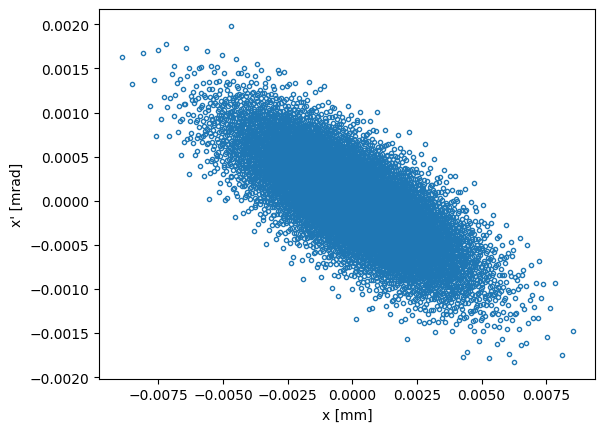

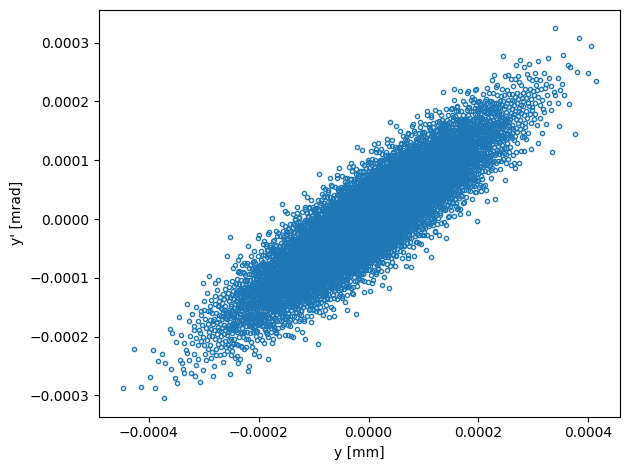

In [14]:
M0 = B0.get_phase_space()

plt.figure()
plt.plot(M0[:,0], M0[:,1], '.', mfc='none')
plt.xlabel('x [mm]')
plt.ylabel("x' [mrad]")

plt.figure()
plt.plot(M0[:,2], M0[:,3], '.', mfc='none')
plt.xlabel('y [mm]')
plt.ylabel("y' [mrad]")
plt.tight_layout()

In [15]:
B1_IP = Ext_ATF2['IP'].get_bunch();

M1 = B1_IP.get_phase_space('%x %xp %y %yp %dt %P')

plt.figure()
plt.plot(M1[:,0], M1[:,1], '.', mfc='none')
plt.xlabel('x [mm]')
plt.ylabel("x' [mrad]")

plt.figure()
plt.plot(M1[:,2]*1e6, M1[:,3], '.', mfc='none')
plt.xlabel('y [nm]')
plt.ylabel("y' [mrad]")
plt.tight_layout()

AttributeError: 'list' object has no attribute 'get_bunch'

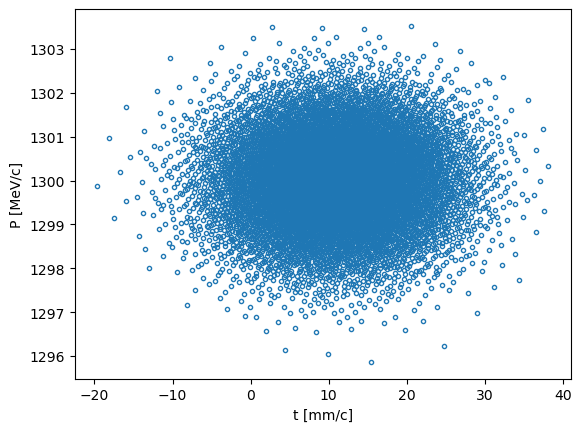

In [ ]:
plt.figure()
plt.plot(M1[:,4], M1[:,5], '.', mfc='none')
plt.xlabel('t [mm/c]')
plt.ylabel("P [MeV/c]")
plt.show()

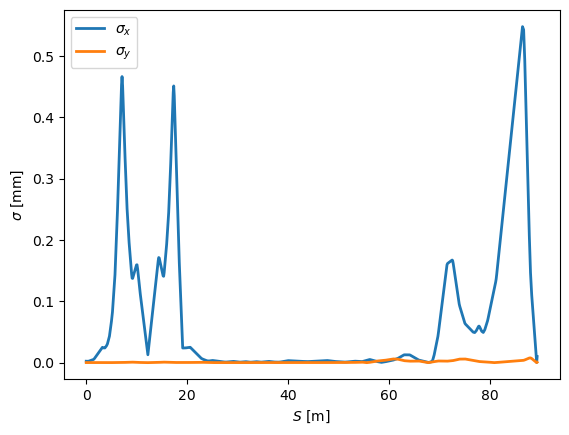

In [ ]:
T = Ext_ATF2.get_transport_table('%S %sigma_x %sigma_y')
plt.plot(T[:,0], T[:,1], linewidth=2, label=r'$\sigma_x$')
plt.plot(T[:,0], T[:,2], linewidth=2, label=r'$\sigma_y$')
plt.legend()
plt.xlabel('$S$ [m]')
plt.ylabel(r'$\sigma$ [mm]')
plt.show()

In [ ]:
T = Ext_ATF2.get_transport_table('%S %disp_x')
plt.plot(T[:,0], T[:,1], linewidth=2, label=r'$D_x$')
plt.legend()
plt.xlabel('$S$ [m]')
plt.ylabel(r'$D_x$ [m]')
plt.show()

NameError: name 'Ext_ATF2' is not defined